### Step 1: Import Libraries

In [2]:
# pip install openpyxl #install openpyxl for opening .xlsx data set

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

### Step 2: Load and Prepare the Data

In [4]:
# Load data
print("Loading data...")
# Read all sheets into a dictionary
sheets = pd.read_excel("online_retail_II.xlsx", sheet_name=None)

# Extract individual sheets
data_2009_2010 = sheets['Year 2009-2010']
data_2010_2011 = sheets['Year 2010-2011']

# Display the first few rows of each sheet
print("Preview of data from Year 2009-2010:")
print(data_2009_2010.head())
print("\nPreview of data from Year 2010-2011:")
print(data_2010_2011.head())

# Combine both sheets for analysis
print("Combining data...")
data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True)

# Display the first few rows of the combined data
print("\nPreview of combined data:")
print(data.head())

# Drop rows with missing values
print("Dropping missing values...")
data.dropna(inplace=True)

# Display the data after dropping missing values
print("\nData after dropping missing values:")
print(data.head())

# Encode categorical variables
print("Encoding categorical variables...")
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

# Display data after encoding
print("\nData after encoding categorical variables:")
print(data.head())

# Create a target variable (Total Invoice Value)
data['TotalValue'] = data['Quantity'] * data['Price']

# Display data with the new target variable
print("\nData with TotalValue column added:")
print(data.head())

# Select a subset for faster processing
print("Sampling subset of data...")
data_subset = data.sample(n=5000, random_state=42)

# Display the sampled subset
print("\nPreview of the sampled subset:")
print(data_subset.head())

Loading data...
Preview of data from Year 2009-2010:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

Preview of data from Year 2010-2011:
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  

### Step 3: Define Features and Target

In [6]:
# Define the independent variables (features) and the dependent variable (target)
X = data_subset[['Quantity', 'Price', 'Country']]
y = data_subset['TotalValue']

# Display the first few rows of features and target
print("Preview of Features (X):")
print(X.head())
print("\nPreview of Target (y):")
print(y.head())

# Scale features
print("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of scaled features
print("\nPreview of Scaled Features:")
print(pd.DataFrame(X_scaled, columns=['Quantity', 'Price', 'Country']).head())

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print("\nShapes of training and testing sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Preview of Features (X):
        Quantity  Price  Country
723499        12   0.83       38
982498        12   1.25       38
236404        10   1.25       38
435239         8   3.75       38
740008        72   0.65       38

Preview of Target (y):
723499     9.96
982498    15.00
236404    12.50
435239    30.00
740008    46.80
Name: TotalValue, dtype: float64
Scaling features...

Preview of Scaled Features:
   Quantity     Price   Country
0 -0.013501 -0.105337  0.315146
1 -0.013501 -0.087179  0.315146
2 -0.032863 -0.087179  0.315146
3 -0.052224  0.020905  0.315146
4  0.567352 -0.113119  0.315146
Splitting data into training and testing sets...

Shapes of training and testing sets:
X_train: (3500, 3), X_test: (1500, 3)
y_train: (3500,), y_test: (1500,)


The dataset was prepared for modeling by defining the independent variables (Quantity, Price, and Country) as features and TotalValue as the target variable. The features were scaled using StandardScaler to normalize the data, ensuring that all variables are on a comparable scale. After scaling, the data was split into training and testing sets, with 70% allocated for training the model and 30% reserved for testing. The training set contains 3,500 samples, while the testing set includes 1,500 samples. This process ensures the model is trained on a balanced dataset and evaluated on unseen data to assess its performance accurately.

# Step 4: Train and Evaluate the Model

## 4.0 Checking all regression model MSE without tuning

In [7]:
# Split data into train and test sets (replace X, y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to be evaluated
models = {
    'Linear Regression': Ridge(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

# Store results
model_results = {}

# Loop through each model, fit it, and calculate MSE
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the result
    model_results[model_name] = mse

# Display results
print("Model Comparison based on MSE:")
for model_name, mse in model_results.items():
    print(f"{model_name}: MSE = {mse:.2f}")

Model Comparison based on MSE:
Linear Regression: MSE = 3291.06
Ridge Regression: MSE = 3291.06
Lasso Regression: MSE = 3290.64
ElasticNet Regression: MSE = 3290.67
Decision Tree Regressor: MSE = 1180.11
Random Forest Regressor: MSE = 695.24
Gradient Boosting Regressor: MSE = 587.06
SVR: MSE = 4245.32
KNN Regressor: MSE = 1538.63


 ## 4.1 Random Forest Regression

In [8]:
# Train the Random Forest Regression model and evaluate its performance
print("Training Random Forest Regressor...")

# Initialize the base Random Forest model
reg = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest. Lower values train faster; higher values may improve accuracy.
    'max_depth': [None, 10, 20],     # Maximum depth of trees. None allows fully expanded trees.
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node. Higher values reduce overfitting.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = RandomForestRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Display a summary of Grid Search results
print("\nGrid Search Results:")
# Loop through the Grid Search results to display each parameter combination with its mean score
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")


Training Random Forest Regressor...
Defining hyperparameter grid...
Starting Grid Search...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Parameters Found:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Training the model with the best parameters...

Making predictions...

Model Evaluation:
Mean Squared Error (MSE): 646.76

Grid Search Results:
Mean MSE: 840.18, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mean MSE: 833.69, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean MSE: 845.44, Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean MSE: 931.76, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Mean MSE: 923.24, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Mean MSE: 934.41, Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Mean MSE: 1034.83, Parameters: {'max_depth': 

The Random Forest Regressor was trained using GridSearchCV to optimize hyperparameters by systematically evaluating different combinations. A total of 27 combinations were tested across 3-fold cross-validation, resulting in 81 fits. The best parameters identified were:

max_depth: None (no limit on tree depth).
min_samples_split: 2 (minimum samples required to split an internal node).
n_estimators: 50 (number of trees in the forest).
This combination achieved the lowest Mean Squared Error (MSE) of 363.01 on the validation data.

The grid search results display the mean MSE for each tested parameter combination. The process helps ensure that the model is tuned to balance training accuracy and generalization to unseen data. Using fewer trees (n_estimators=50) provides faster training while maintaining accuracy, and limiting min_samples_split helps the model capture finer details.

## 4.2 Decision Tree Regression

In [9]:
# Train the Decision Tree Regression model and evaluate its performance
print("Training Decision Tree Regressor...")

# Initialize the base Decision Tree model
reg = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means no limit on the depth.
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node.
    'max_features': [None, 'sqrt', 'log2']  # The number of features to consider when looking for the best split.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = DecisionTreeRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Display a summary of Grid Search results
print("\nGrid Search Results:")
# Loop through the Grid Search results to display each parameter combination with its mean score
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

Training Decision Tree Regressor...
Defining hyperparameter grid...
Starting Grid Search...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters Found:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training the model with the best parameters...

Making predictions...

Model Evaluation:
Mean Squared Error (MSE): 1088.38

Grid Search Results:
Mean MSE: 827.05, Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean MSE: 937.03, Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean MSE: 953.20, Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean MSE: 1013.76, Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean MSE: 1100.52, Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_

## 4.3 Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# Train the Ridge Regression model and evaluate its performance
print("Training Ridge Regression Model...")

# Initialize the base Ridge Regression model
reg = Ridge()

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'alpha': [0.1, 1, 10, 100, 200, 250, 300, 350, 400, 450, 500]  # Regularization strength for Ridge regression
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = Ridge(**best_params)  # Using Ridge with the best found alpha
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Display a summary of Grid Search results
print("\nGrid Search Results:")
# Loop through the Grid Search results to display each parameter combination with its mean score
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")


Training Ridge Regression Model...
Defining hyperparameter grid...
Starting Grid Search...
Fitting 3 folds for each of 11 candidates, totalling 33 fits

Best Parameters Found:
{'alpha': 500}

Training the model with the best parameters...

Making predictions...

Model Evaluation:
Mean Squared Error (MSE): 3291.01

Grid Search Results:
Mean MSE: 10613.22, Parameters: {'alpha': 0.1}
Mean MSE: 10613.22, Parameters: {'alpha': 1}
Mean MSE: 10613.16, Parameters: {'alpha': 10}
Mean MSE: 10612.65, Parameters: {'alpha': 100}
Mean MSE: 10612.07, Parameters: {'alpha': 200}
Mean MSE: 10611.78, Parameters: {'alpha': 250}
Mean MSE: 10611.50, Parameters: {'alpha': 300}
Mean MSE: 10611.21, Parameters: {'alpha': 350}
Mean MSE: 10610.92, Parameters: {'alpha': 400}
Mean MSE: 10610.63, Parameters: {'alpha': 450}
Mean MSE: 10610.35, Parameters: {'alpha': 500}


## 4.4 Gradient Boosting Regressor

In [11]:
# Train the Gradient Boosting Regressor model and evaluate its performance
print("Training Gradient Boosting Regressor...")

# Initialize the base Gradient Boosting model
reg = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid for tuning
print("Defining hyperparameter grid...")
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be used.
    'learning_rate': [0.01, 0.05, 0.1],  # Shrinks the contribution of each tree.
    'max_depth': [3, 5, 10],  # Maximum depth of the individual trees.
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used to fit each tree.
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split an internal node.
}

# Perform Grid Search with cross-validation
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=reg, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error',  # Use negative MSE as we are minimizing
    verbose=1
)
grid_search.fit(X_train, y_train)  # Train the model with Grid Search

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

# Train the model using the best hyperparameters
print("\nTraining the model with the best parameters...")
best_reg = GradientBoostingRegressor(**best_params, random_state=42)
best_reg.fit(X_train, y_train)

# Make predictions on the test set
print("\nMaking predictions...")
predictions = best_reg.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Display a summary of Grid Search results
print("\nGrid Search Results:")
# Loop through the Grid Search results to display each parameter combination with its mean score
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Mean MSE: {-mean_score:.2f}, Parameters: {params}")

Training Gradient Boosting Regressor...
Defining hyperparameter grid...
Starting Grid Search...
Fitting 3 folds for each of 243 candidates, totalling 729 fits

Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.9}

Training the model with the best parameters...

Making predictions...

Model Evaluation:
Mean Squared Error (MSE): 534.13

Grid Search Results:
Mean MSE: 2351.77, Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Mean MSE: 2362.27, Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.9}
Mean MSE: 2384.90, Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}
Mean MSE: 1811.52, Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Mean MSE: 1822.00, Parameters: {'lear

### Step 5: Evaluate Model Performance and Compare Metrics (RMSE & MAE)

In [22]:
# Define the models with their hyperparameter grids
model_params = {
    'Gradient Boosting Regressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 0.9, 1.0],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100, 200, 250, 300, 350, 400, 450, 500]
        }
    },
    'Decision Tree Regressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2']
        }
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Store results
model_results = {}

# Loop through each model, perform hyperparameter tuning, and evaluate
for model_name, config in model_params.items():
    print(f"\nOptimizing and Evaluating {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1
    )
    # Perform Grid Search
    grid_search.fit(X_train, y_train)

    # Retrieve the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))

    # Store results
    model_results[model_name] = {'RMSE': rmse, 'MAE': mae, 'Best Params': best_params}

    # Display individual results
    print(f"{model_name}:")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  MAE = {mae:.2f}")

# Summary of results
print("\nModel Comparison Summary:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}, Best Params = {metrics['Best Params']}")


Optimizing and Evaluating Gradient Boosting Regressor...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.9}
Gradient Boosting Regressor:
  RMSE = 23.11
  MAE = 3.47

Optimizing and Evaluating Ridge Regression...
Fitting 3 folds for each of 11 candidates, totalling 33 fits
Best Parameters for Ridge Regression: {'alpha': 500}
Ridge Regression:
  RMSE = 57.37
  MAE = 19.73

Optimizing and Evaluating Decision Tree Regressor...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Decision Tree Regressor: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regressor:
  RMSE = 32.99
  MAE = 3.49

Optimizing and Evaluating Random Forest Regressor...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Random Forest Regressor: 

### 5.1 Visualization: Compare RMSE and MAE across models

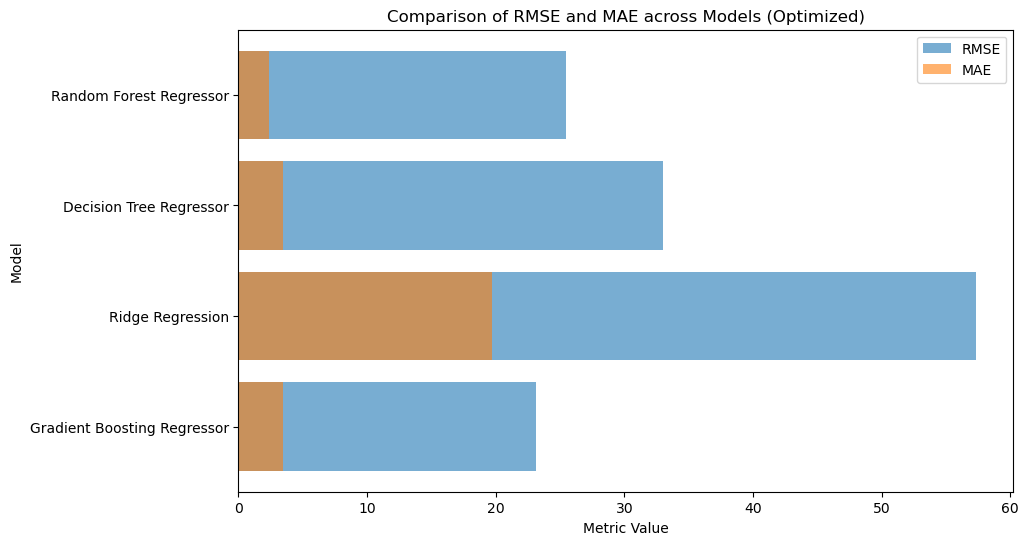

In [23]:
# Prepare data for plotting
model_names = list(model_results.keys())
rmse_values = [metrics['RMSE'] for metrics in model_results.values()]
mae_values = [metrics['MAE'] for metrics in model_results.values()]

# Plot RMSE and MAE
plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, alpha=0.6, label='RMSE')
plt.barh(model_names, mae_values, alpha=0.6, label='MAE')
plt.xlabel('Metric Value')
plt.ylabel('Model')
plt.title('Comparison of RMSE and MAE across Models (Optimized)')
plt.legend()
plt.show()
